### Librerías

In [1]:
#### Tratamiento de datos ####
import pandas as pd
import numpy as np

#### Graficos ####
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#### EDA ####
from scipy.stats import pearsonr

#### Otros ####
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

### Funciones

In [2]:
def inspeccionar_valores_nulos(df):
    # Inspección de valores nulos
    nulos = pd.DataFrame(df.isna().sum().reset_index())
    nulos = nulos.rename(columns={"index": "Variable", 0: "Nulos"})
    
    # Calcular el porcentaje de nulos
    nulos['Porcentaje Nulos'] = (nulos['Nulos'] / len(df)) * 100
    
    # Ordenar por número de nulos en orden descendente
    nulos = nulos.sort_values(by='Nulos', ascending=False)
    
    # Mostrar el resultado
    #print(nulos)
    
    return nulos

In [3]:
def get_column_types(df):
    """
    Returns two lists: one with the names of categorical columns and another with the names of numeric columns.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    tuple: A tuple containing two lists - (categorical_columns, numeric_columns).
    """
    categorical_columns = df.select_dtypes(include='object').columns.tolist()
    numeric_columns = df.select_dtypes(include='number').columns.tolist()
    
    return categorical_columns, numeric_columns

In [4]:
def correlate_with_target(df, target_col, numeric_columns, method='pearson'):
    """
    Calculates the correlation of numeric variables in a DataFrame with the target variable.
    
    Parameters:
    - df: pandas DataFrame containing the data
    - target_col: str, name of the target variable column
    - numeric_columns: list, list of numeric variable columns
    - method: str, correlation method to use ('pearson' or 'spearman')
    
    Returns:
    - correlation_df: pandas DataFrame with correlation coefficients and p-values
    """
    correlations = {}
    
    for col in numeric_columns:
        if col == target_col:
            continue
        
        if method == 'pearson':
            corr_coef, p_value = pearsonr(df[col], df[target_col])
        elif method == 'spearman':
            corr_coef, p_value = spearmanr(df[col], df[target_col])
        else:
            raise ValueError("Method must be either 'pearson' or 'spearman'")
        
        correlations[col] = (corr_coef, p_value)
    
    correlation_df = pd.DataFrame(correlations, index=['Correlation', 'P-value']).T
    correlation_df = correlation_df.sort_values(by = 'Correlation', ascending = False)
    return correlation_df

### Importando Datos

In [5]:
datos = pd.read_csv("kc_house_data.csv", engine='c')

In [6]:
#copia de los datos
df = datos.copy()

In [7]:
#Primer vistazo de los datos
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221900.00         3       1.00         1180   
1  6414100192  20141209T000000 538000.00         3       2.25         2570   
2  5631500400  20150225T000000 180000.00         2       1.00          770   
3  2487200875  20141209T000000 604000.00         4       3.00         1960   
4  1954400510  20150218T000000 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650    1.00           0     0          3      7        1180   
1      7242    2.00           0     0          3      7        2170   
2     10000    1.00           0     0          3      6         770   
3      5000    1.00           0     0          5      7        1050   
4      8080    1.00           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode   lat    long  \
0              0      1955             0    98178 47.51 -122.26   
1            400      1951          1991    98125 47.72 -122.32   
2              0      1933             0    98028 47.74 -122.23   
3            910      1965             0    98136 47.52 -122.39   
4              0      1987             0    98074 47.62 -122.05   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

### Descripción de las variables del df

**Date**: fecha de la venta <br>	
**Price**: Precio de la casa (var objetivo)<br>
**Bedrooms**: Número de habitaciones	<br>
**Bathrooms**: Número de baños<br>
**sqft_living**: Metros cuadrados habitables<br>
**sqft_lot**: Metros cuadrados del lote o terreno <br>	
**Floors**: Pisos	<br>
**Waterfront**: Si tiene vista al mar o no. <br>	
**View**: Cuantas veces la casa ha sido vista <br>
**Condition**: Indica la condición de la casa. 1 indica propiedad gastada y 5 excelente <br>	
**Grade**: calificación general otorgada a la vivienda. 1 indica que es es pobre y 13 es excelente <br>	
**sqft_above**: Metros cuadrados aparte del sotano	<br>
**sqft_basement**: Metros cuadrados del sotano	<br>
**yr_built**: Año en que fue construida la casa <br>	
**yr_renovated**:  Año en que fue renovada la casa.<br>	
**Zipcode**: Codigo postal de la casa <br>		
**Lat**: Latitud de la casa	<br>	
**Long**: Longitud de la casa <br>		
**sqft_living15**: Metros cuadrados habitables al 2015 <br>	
**sqft_lot15**: Metros cuadrados del lote al 2015

In [8]:
# Forma del df
df.shape

(21613, 21)

In [9]:
# Estructura de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
# Grade y Condition representan categorías (ordinales). Se cambian a este tipo de datos
df['grade'] = df['grade'].astype('object')
df['condition'] = df['condition'].astype('object')
df['waterfront'] = df['waterfront'].astype('object')
df['zipcode'] = df['zipcode'].astype('object')
df['date'] = pd.to_datetime(df['date'])
df['AñoVenta'] =df['date'].dt.year.astype('int')
df['AñosConst'] = df['AñoVenta'] - df['yr_built']
df['AñosRenov'] = df['AñosRenov'] = np.where(df['yr_renovated'] != 0, df['AñoVenta'] - df['yr_renovated'],df['AñoVenta'] - df['yr_built'] )

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  object        
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  object        
 11  grade          21613 non-null  object        
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [12]:
#Inspeccionando valores nulos
inspeccionar_valores_nulos(df)

Variable  Nulos  Porcentaje Nulos
0              id      0              0.00
1            date      0              0.00
22      AñosConst      0              0.00
21       AñoVenta      0              0.00
20     sqft_lot15      0              0.00
19  sqft_living15      0              0.00
18           long      0              0.00
17            lat      0              0.00
16        zipcode      0              0.00
15   yr_renovated      0              0.00
14       yr_built      0              0.00
13  sqft_basement      0              0.00
12     sqft_above      0              0.00
11          grade      0              0.00
10      condition      0              0.00
9            view      0              0.00
8      waterfront      0              0.00
7          floors      0              0.00
6        sqft_lot      0              0.00
5     sqft_living      0              0.00
4       bathrooms      0              0.00
3        bedrooms      0              0.00
2           price      0              0.00
23      AñosRenov      0              0.00

#### EDA

In [13]:
#Principales estadisticas del df
df.describe()

id                           date      price  bedrooms  \
count      21613.00                          21613   21613.00  21613.00   
mean  4580301520.86  2014-10-29 04:38:01.959931648  540088.14      3.37   
min      1000102.00            2014-05-02 00:00:00   75000.00      0.00   
25%   2123049194.00            2014-07-22 00:00:00  321950.00      3.00   
50%   3904930410.00            2014-10-16 00:00:00  450000.00      3.00   
75%   7308900445.00            2015-02-17 00:00:00  645000.00      4.00   
max   9900000190.00            2015-05-27 00:00:00 7700000.00     33.00   
std   2876565571.31                            NaN  367127.20      0.93   

       bathrooms  sqft_living   sqft_lot   floors     view  sqft_above  \
count   21613.00     21613.00   21613.00 21613.00 21613.00    21613.00   
mean        2.11      2079.90   15106.97     1.49     0.23     1788.39   
min         0.00       290.00     520.00     1.00     0.00      290.00   
25%         1.75      1427.00    5040.00     1.00     0.00     1190.00   
50%         2.25      1910.00    7618.00     1.50     0.00     1560.00   
75%         2.50      2550.00   10688.00     2.00     0.00     2210.00   
max         8.00     13540.00 1651359.00     3.50     4.00     9410.00   
std         0.77       918.44   41420.51     0.54     0.77      828.09   

       sqft_basement  yr_built  yr_renovated      lat     long  sqft_living15  \
count       21613.00  21613.00      21613.00 21613.00 21613.00       21613.00   
mean          291.51   1971.01         84.40    47.56  -122.21        1986.55   
min             0.00   1900.00          0.00    47.16  -122.52         399.00   
25%             0.00   1951.00          0.00    47.47  -122.33        1490.00   
50%             0.00   1975.00          0.00    47.57  -122.23        1840.00   
75%           560.00   1997.00          0.00    47.68  -122.12        2360.00   
max          4820.00   2015.00       2015.00    47.78  -121.31        6210.00   
std           442.58     29.37        401.68     0.14     0.14         685.39   

       sqft_lot15  AñoVenta  AñosConst  AñosRenov  
count    21613.00  21613.00   21613.00   21613.00  
mean     12768.46   2014.32      43.32      40.94  
min        651.00   2014.00      -1.00      -1.00  
25%       5100.00   2014.00      18.00      15.00  
50%       7620.00   2014.00      40.00      37.00  
75%      10083.00   2015.00      63.00      60.00  
max     871200.00   2015.00     115.00     115.00  
std      27304.18      0.47      29.38      28.81

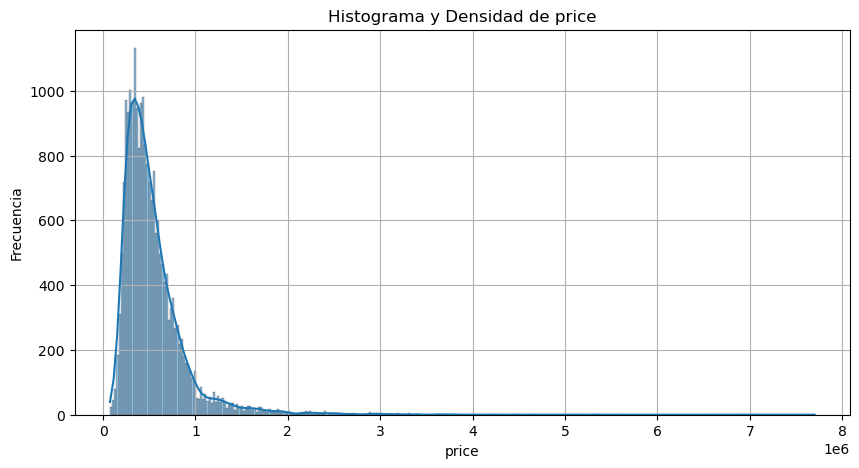

In [14]:
target_col = 'price'

# Generar histograma y densidad
plt.figure(figsize=(10, 5))
sns.histplot(df[target_col], kde=True)
plt.title(f'Histograma y Densidad de {target_col}')
plt.xlabel(target_col)
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#### Variable objetivo está altamente sesgada a la derecha.

In [15]:
#Percentil 95 de price
df.price.quantile(0.99)

1964400.0000000051

In [16]:
# Calcular el percentil 95
percentil_95 = df['price'].quantile(0.99)
        
df2= df[df['price']<=percentil_95]

In [17]:
df2.describe()

id                           date      price  bedrooms  \
count      21396.00                          21396   21396.00  21396.00   
mean  4586695713.40  2014-10-29 04:42:40.179472896  518115.33      3.36   
min      1000102.00            2014-05-02 00:00:00   75000.00      0.00   
25%   2124547268.25            2014-07-22 00:00:00  320000.00      3.00   
50%   3905000270.00            2014-10-16 00:00:00  450000.00      3.00   
75%   7320652766.25            2015-02-17 00:00:00  635000.00      4.00   
max   9900000190.00            2015-05-27 00:00:00 1960000.00     33.00   
std   2877290539.24                            NaN  284587.46      0.92   

       bathrooms  sqft_living   sqft_lot   floors     view  sqft_above  \
count   21396.00     21396.00   21396.00 21396.00 21396.00    21396.00   
mean        2.10      2050.49   14993.24     1.49     0.22     1766.21   
min         0.00       290.00     520.00     1.00     0.00      290.00   
25%         1.50      1420.00    5026.00     1.00     0.00     1190.00   
50%         2.25      1900.00    7575.50     1.50     0.00     1550.00   
75%         2.50      2520.00   10548.50     2.00     0.00     2190.00   
max         7.50      7730.00 1651359.00     3.50     4.00     7420.00   
std         0.75       861.41   40979.49     0.54     0.73      791.59   

       sqft_basement  yr_built  yr_renovated      lat     long  sqft_living15  \
count       21396.00  21396.00      21396.00 21396.00 21396.00       21396.00   
mean          284.28   1970.99         82.27    47.56  -122.21        1971.61   
min             0.00   1900.00          0.00    47.16  -122.52         399.00   
25%             0.00   1951.75          0.00    47.47  -122.33        1480.00   
50%             0.00   1975.00          0.00    47.57  -122.23        1830.00   
75%           550.00   1997.00          0.00    47.68  -122.12        2340.00   
max          3260.00   2015.00       2015.00    47.78  -121.31        5790.00   
std           430.40     29.31        396.79     0.14     0.14         668.10   

       sqft_lot15  AñoVenta  AñosConst  AñosRenov  
count    21396.00  21396.00   21396.00   21396.00  
mean     12696.71   2014.32      43.33      41.00  
min        651.00   2014.00      -1.00      -1.00  
25%       5100.00   2014.00      18.00      16.00  
50%       7600.00   2014.00      40.00      37.00  
75%      10021.25   2015.00      63.00      60.00  
max     871200.00   2015.00     115.00     115.00  
std      27203.76      0.47      29.31      28.76

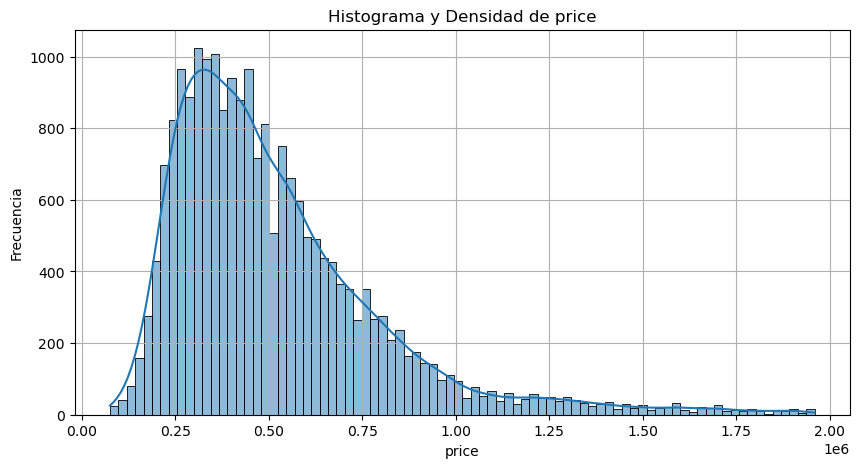

In [18]:
target_col = 'price'

# Generar histograma y densidad
plt.figure(figsize=(10, 5))
sns.histplot(df2[target_col], kde=True)
plt.title(f'Histograma y Densidad de {target_col}')
plt.xlabel(target_col)
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#### Los valores mayores al percentil 99 fueron eliminados. La distribución se torna más normal 

In [19]:
# Listas con variables categoricas y numericas
categorical_columns, numeric_columns= get_column_types(df2)

In [20]:
#Elimino
numeric_columns.remove('price')
numeric_columns.remove('id')

In [21]:
#Correlacionando con las variables con price
correlate_with_target(df2, 'price',numeric_columns)

Correlation  P-value
sqft_living           0.68     0.00
sqft_living15         0.60     0.00
sqft_above            0.58     0.00
bathrooms             0.51     0.00
lat                   0.37     0.00
view                  0.34     0.00
bedrooms              0.31     0.00
sqft_basement         0.28     0.00
floors                0.28     0.00
yr_renovated          0.12     0.00
sqft_lot              0.10     0.00
sqft_lot15            0.09     0.00
yr_built              0.06     0.00
long                  0.04     0.00
AñoVenta              0.01     0.42
AñosConst            -0.06     0.00
AñosRenov            -0.11     0.00

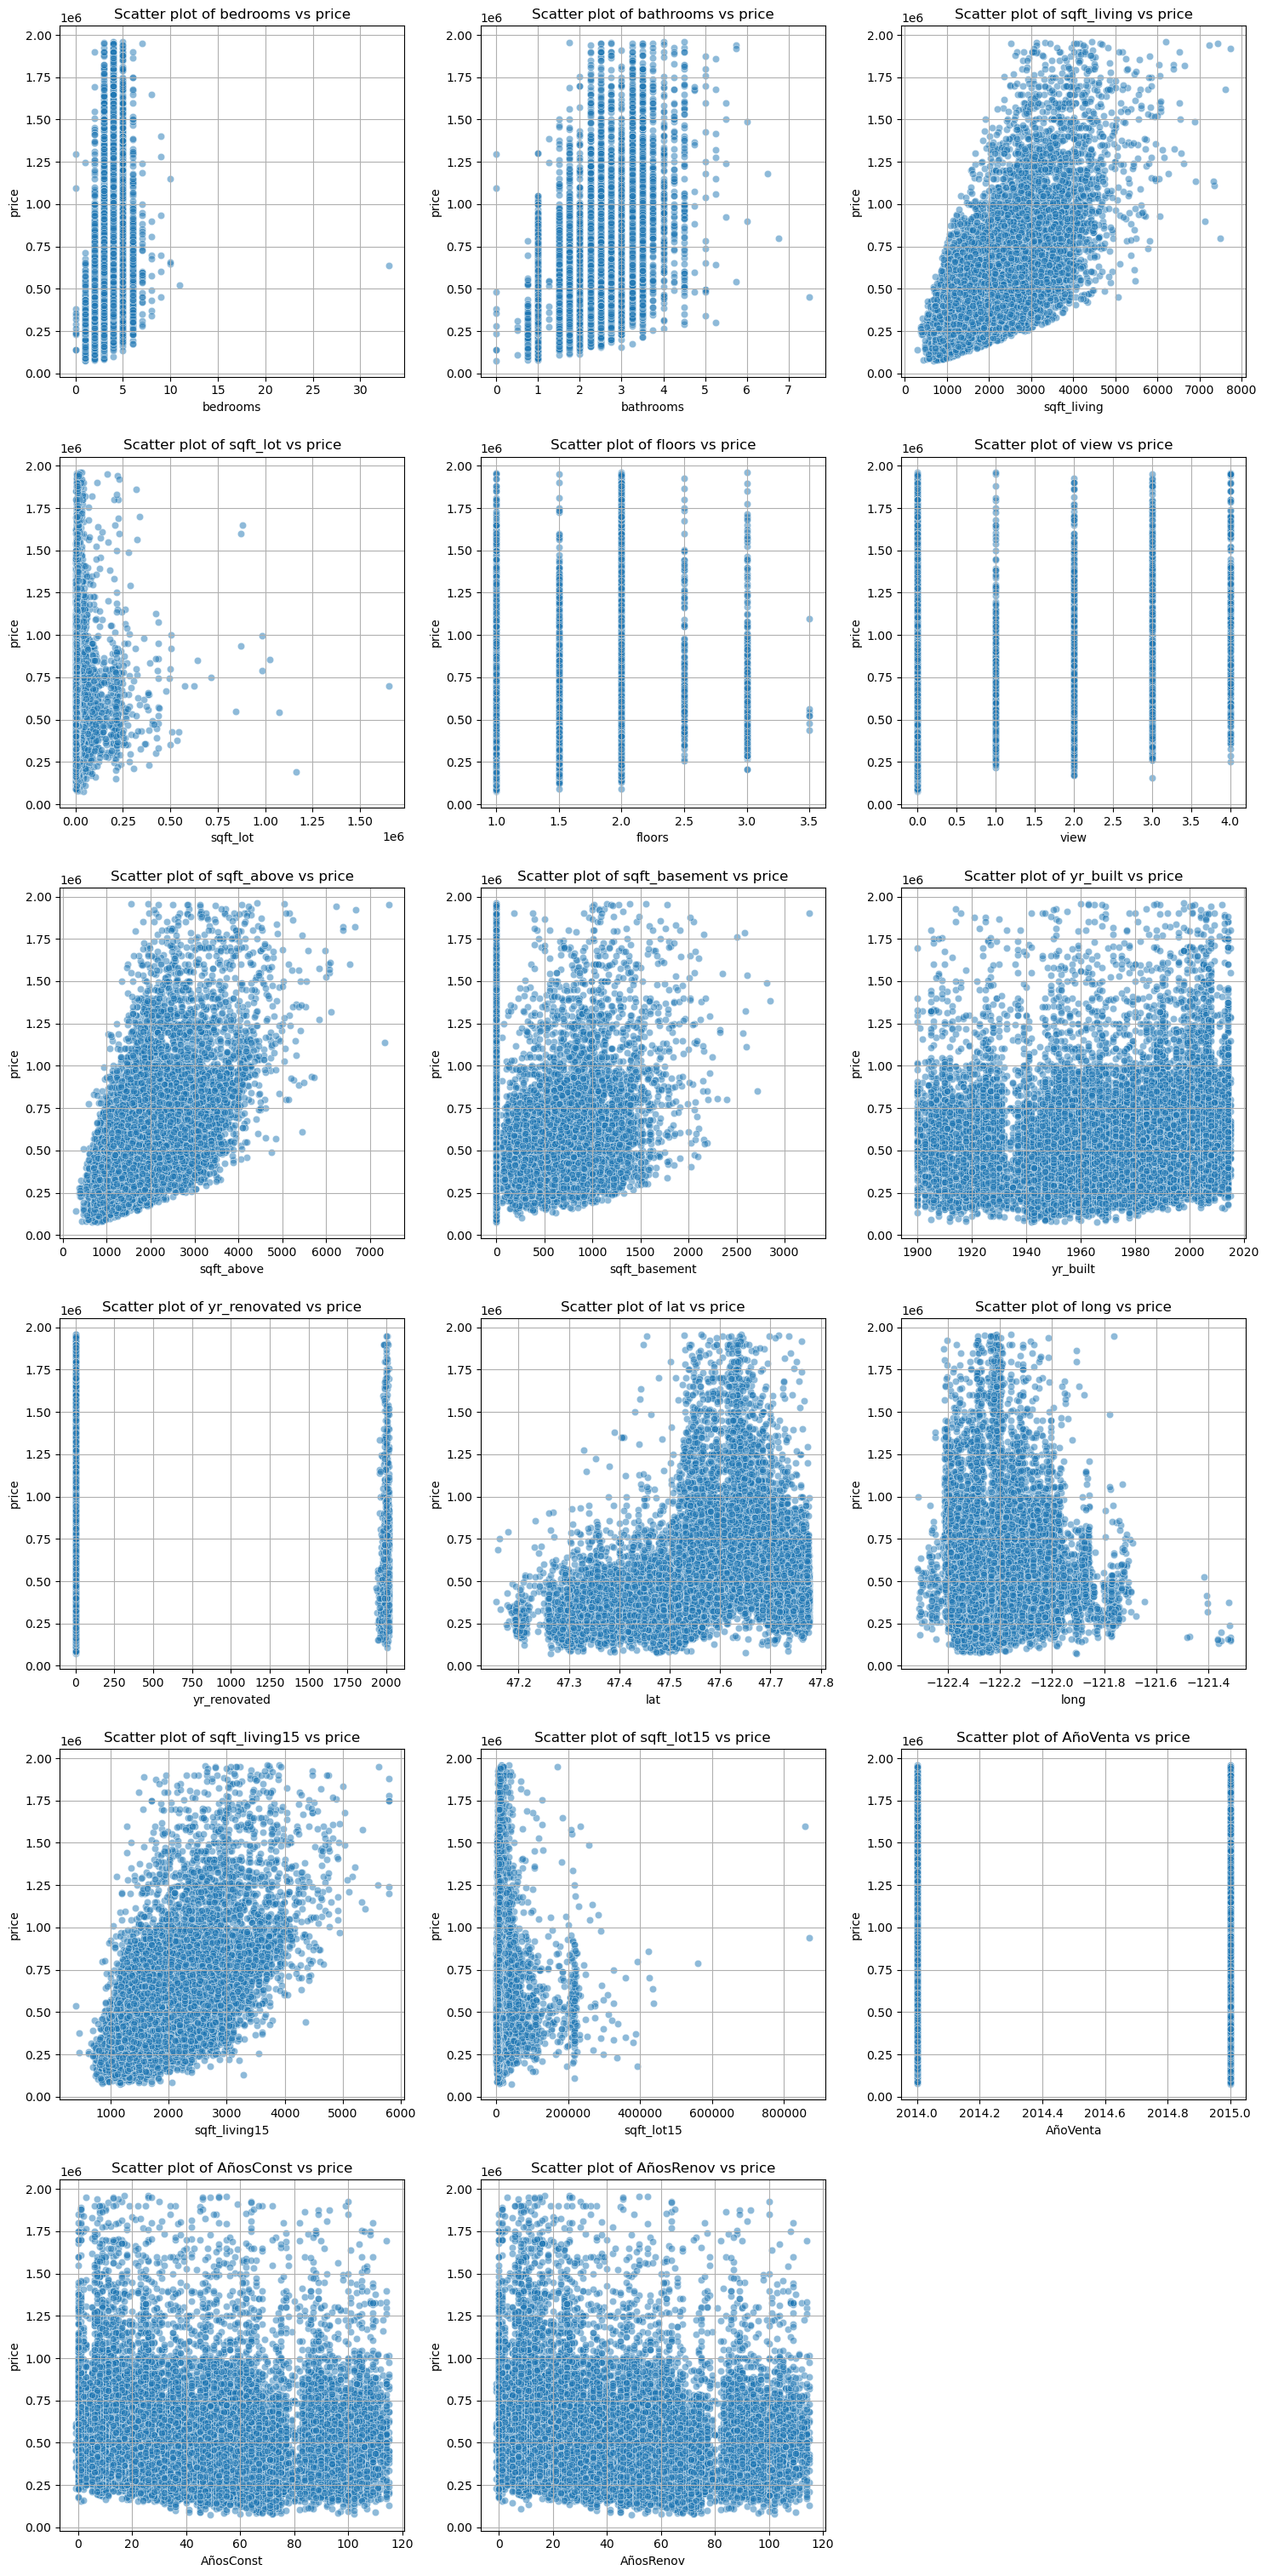

In [22]:
target_col = 'price'

num_rows = 7
num_cols = 3

# Crear subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
axes = axes.flatten()

# Generar gráficos de dispersión
for i, col in enumerate(numeric_columns):
    if i >= num_rows * num_cols:
        break
    sns.scatterplot(x=df2[col], y=df2[target_col], ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Scatter plot of {col} vs {target_col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)
    axes[i].grid(True)

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout()
plt.show()

In [23]:
columnas = ['bedrooms','sqft_lot', 'sqft_lot15']

# Iterar sobre cada columna numérica
for columna in columnas:
    # Calcular el percentil 95
    percentil_95 = df2[columna].quantile(0.99)
        
    # Reemplazar los valores mayores al percentil 95 por el valor del percentil 95
    df2[columna] = df2[columna].apply(lambda x: percentil_95 if x > percentil_95 else x)

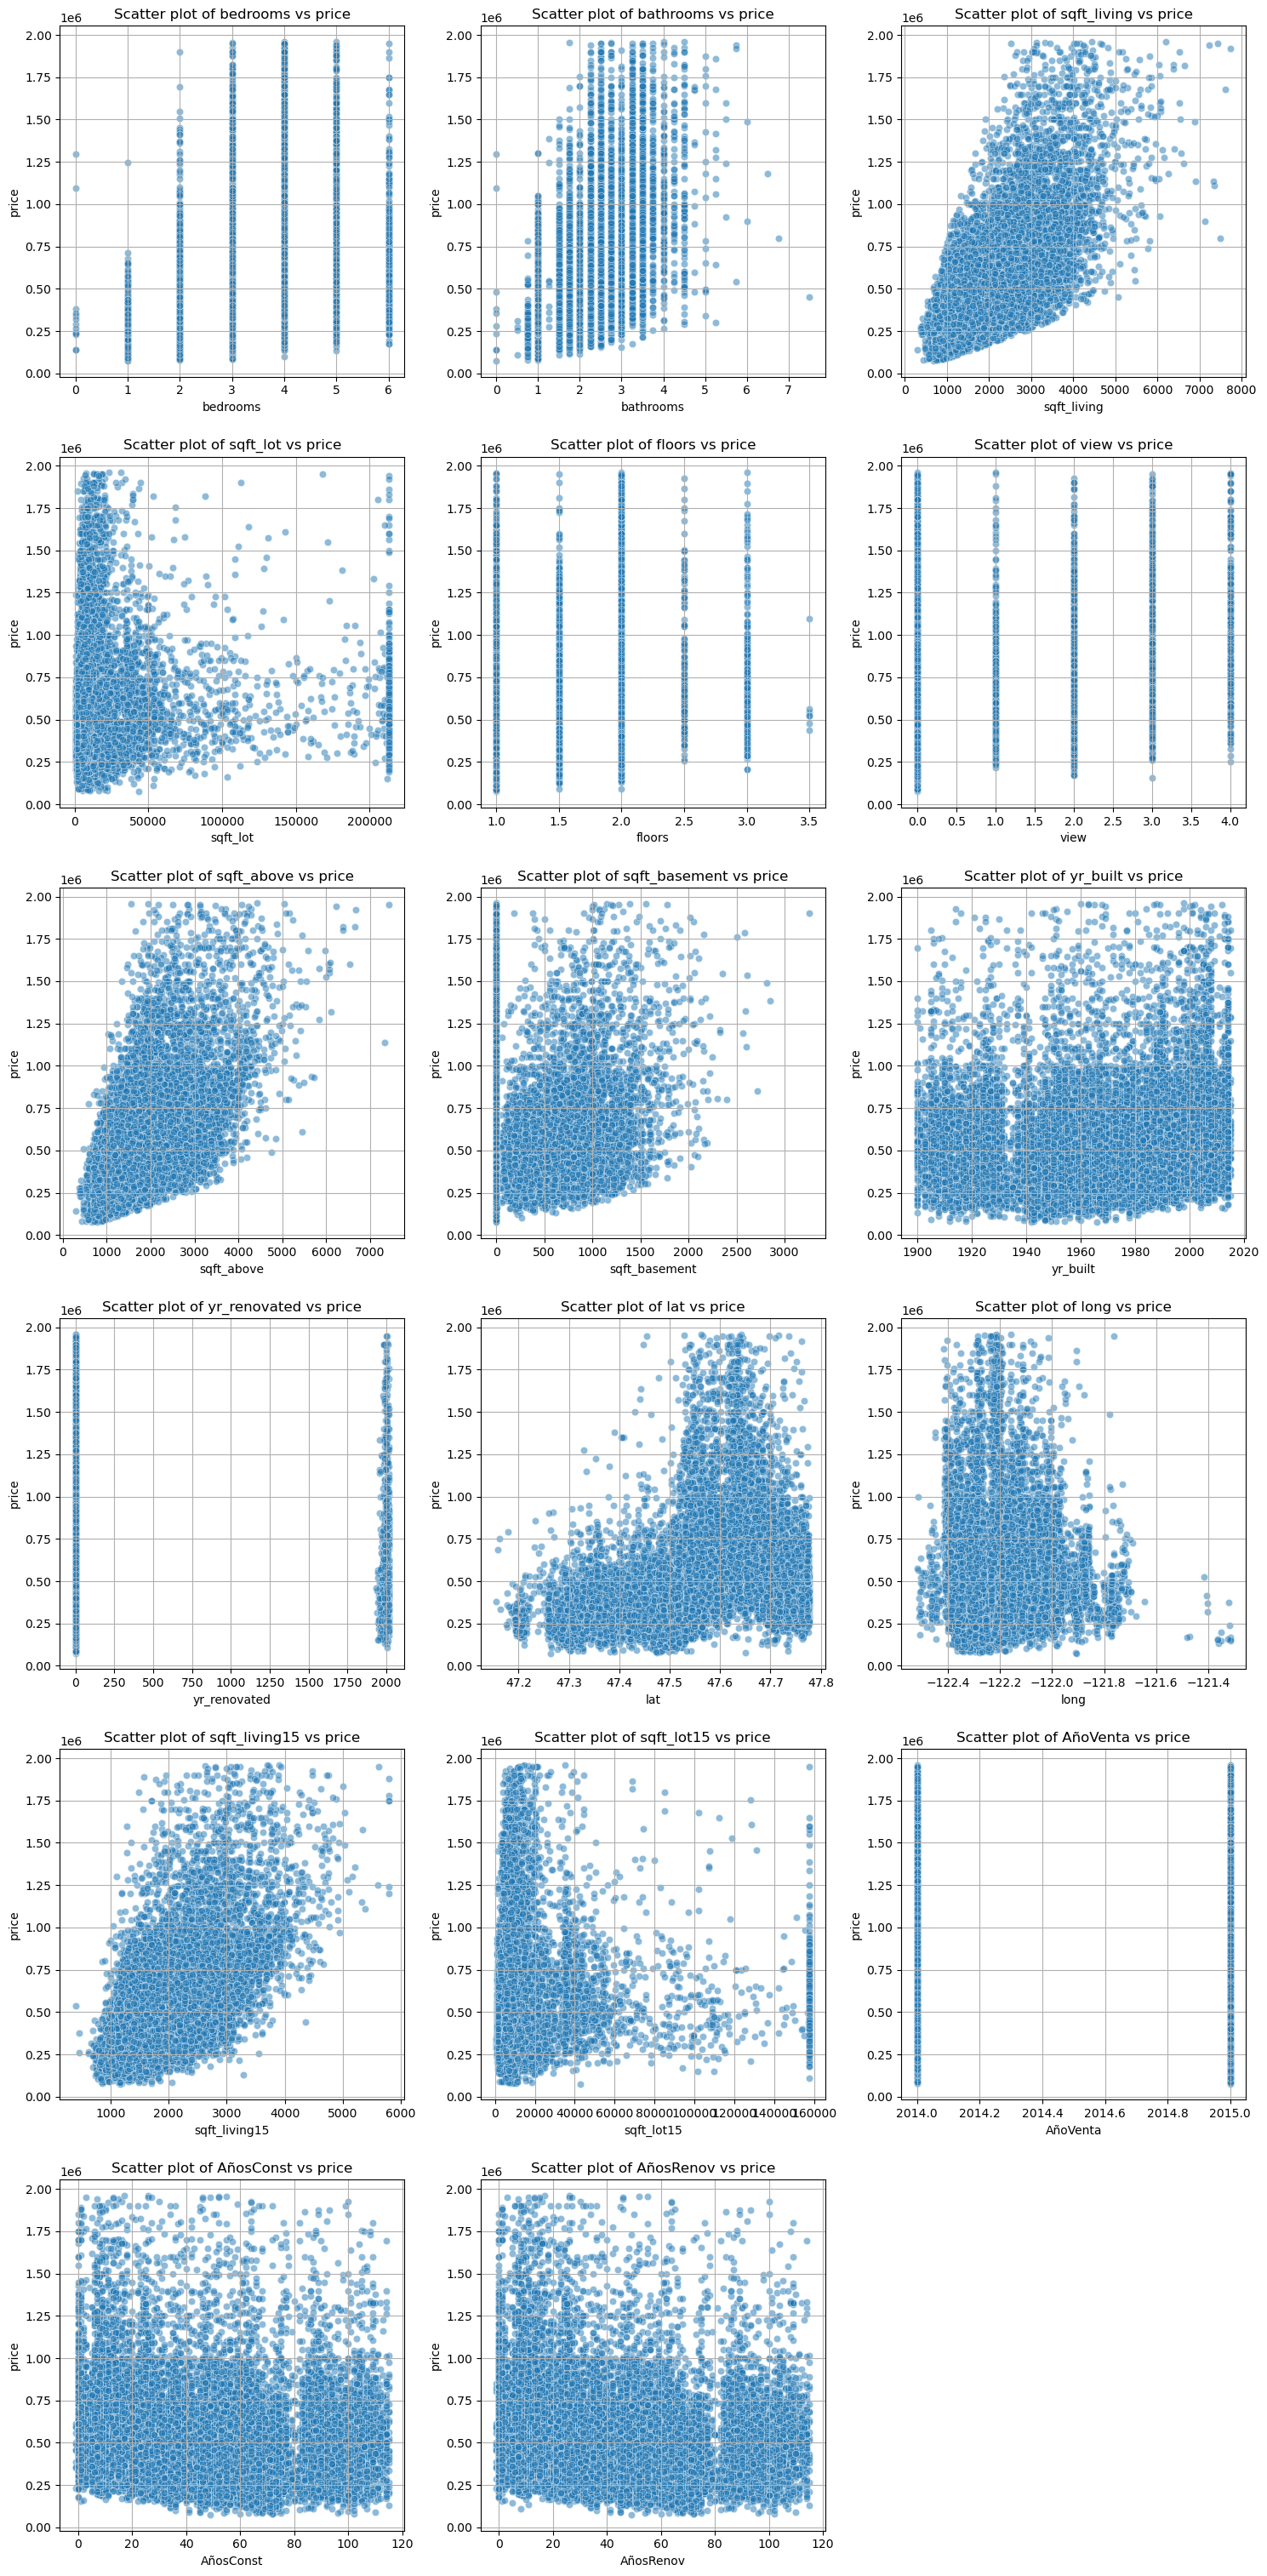

In [24]:
target_col = 'price'

num_rows = 7
num_cols = 3

# Crear subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
axes = axes.flatten()

# Generar gráficos de dispersión
for i, col in enumerate(numeric_columns):
    if i >= num_rows * num_cols:
        break
    sns.scatterplot(x=df2[col], y=df2[target_col], ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Scatter plot of {col} vs {target_col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)
    axes[i].grid(True)

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout()
plt.show()

In [25]:
df2.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.00      3.00       1.00         1180   
1  6414100192 2014-12-09 538000.00      3.00       2.25         2570   
2  5631500400 2015-02-25 180000.00      2.00       1.00          770   
3  2487200875 2014-12-09 604000.00      4.00       3.00         1960   
4  1954400510 2015-02-18 510000.00      3.00       2.00         1680   

   sqft_lot  floors waterfront  view condition grade  sqft_above  \
0   5650.00    1.00          0     0         3     7        1180   
1   7242.00    2.00          0     0         3     7        2170   
2  10000.00    1.00          0     0         3     6         770   
3   5000.00    1.00          0     0         5     7        1050   
4   8080.00    1.00          0     0         3     8        1680   

   sqft_basement  yr_built  yr_renovated zipcode   lat    long  sqft_living15  \
0              0      1955             0   98178 47.51 -122.26           1340   
1            400      1951          1991   98125 47.72 -122.32           1690   
2              0      1933             0   98028 47.74 -122.23           2720   
3            910      1965             0   98136 47.52 -122.39           1360   
4              0      1987             0   98074 47.62 -122.05           1800   

   sqft_lot15  AñoVenta  AñosConst  AñosRenov  
0     5650.00      2014         59         59  
1     7639.00      2014         63         23  
2     8062.00      2015         82         82  
3     5000.00      2014         49         49  
4     7503.00      2015         28         28

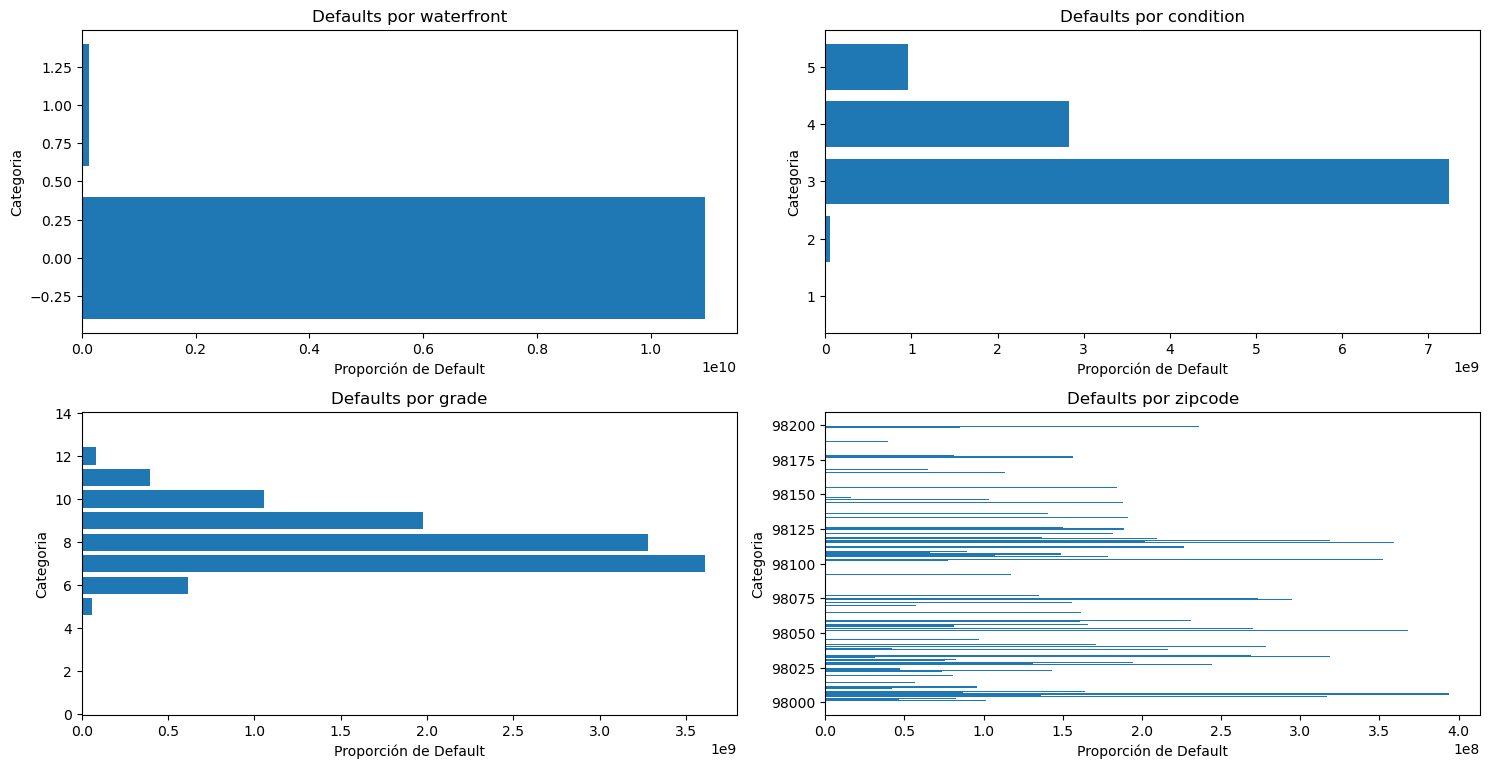

In [26]:
fig, axes = plt.subplots(4, 2, figsize=(15,15))  # 4 filas y 2 columnas

for i, category in enumerate(categorical_columns):
    if i >= len(axes.flatten()):
        break
    ax = axes.flatten()[i]
    grouped_data = df2.groupby(category)['price'].sum()
    ax.barh(grouped_data.index, grouped_data.values)
    ax.set_xlabel('Proporción de Default')
    ax.set_ylabel('Categoria')
    ax.set_title(f'Defaults por {category}')

# Eliminar los gráficos vacíos si hay menos de 8 categorías
if len(categorical_columns) < len(axes.flatten()):
    for j in range(len(categorical_columns), len(axes.flatten())):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

#### Creacion zipcode2

In [27]:
zipcode_counts = df2['zipcode'].value_counts().reset_index()
zipcode_counts.columns = ['zipcode', 'zipcode_count']

In [28]:
# Calcular la proporción y la proporción acumulada en zipcode_counts
zipcode_counts['proportion'] = zipcode_counts['zipcode_count'] / zipcode_counts['zipcode_count'].sum()
zipcode_counts['cumulative_proportion'] = zipcode_counts['proportion'].cumsum()

In [29]:
zipcode_counts['zipcode_2'] = np.where(zipcode_counts['zipcode_count'] < 403, 'Otro', zipcode_counts['zipcode'])

In [30]:
zipcode_counts

zipcode  zipcode_count  proportion  cumulative_proportion zipcode_2
0     98103            602        0.03                   0.03     98103
1     98038            590        0.03                   0.06     98038
2     98115            582        0.03                   0.08     98115
3     98052            573        0.03                   0.11     98052
4     98117            553        0.03                   0.14     98117
5     98042            548        0.03                   0.16     98042
6     98034            539        0.03                   0.19     98034
7     98118            507        0.02                   0.21     98118
8     98023            499        0.02                   0.23     98023
9     98133            494        0.02                   0.26     98133
10    98006            485        0.02                   0.28     98006
11    98059            468        0.02                   0.30     98059
12    98058            455        0.02                   0.32     98058
13    98155            445        0.02                   0.34     98155
14    98074            438        0.02                   0.36     98074
15    98033            422        0.02                   0.38     98033
16    98027            408        0.02                   0.40     98027
17    98125            408        0.02                   0.42     98125
18    98056            404        0.02                   0.44     98056
19    98053            403        0.02                   0.46     98053
20    98001            362        0.02                   0.48      Otro
21    98075            355        0.02                   0.49      Otro
22    98126            354        0.02                   0.51      Otro
23    98092            351        0.02                   0.53      Otro
24    98144            337        0.02                   0.54      Otro
25    98106            335        0.02                   0.56      Otro
26    98116            329        0.02                   0.57      Otro
27    98029            320        0.01                   0.59      Otro
28    98199            311        0.01                   0.60      Otro
29    98065            309        0.01                   0.62      Otro
30    98122            289        0.01                   0.63      Otro
31    98146            288        0.01                   0.64      Otro
32    98028            283        0.01                   0.66      Otro
33    98198            280        0.01                   0.67      Otro
34    98003            280        0.01                   0.68      Otro
35    98008            277        0.01                   0.70      Otro
36    98004            276        0.01                   0.71      Otro
37    98031            274        0.01                   0.72      Otro
38    98072            273        0.01                   0.73      Otro
39    98168            269        0.01                   0.75      Otro
40    98055            268        0.01                   0.76      Otro
41    98107            264        0.01                   0.77      Otro
42    98178            262        0.01                   0.78      Otro
43    98040            261        0.01                   0.80      Otro
44    98136            261        0.01                   0.81      Otro
45    98030            256        0.01                   0.82      Otro
46    98166            252        0.01                   0.83      Otro
47    98177            249        0.01                   0.84      Otro
48    98112            241        0.01                   0.85      Otro
49    98022            234        0.01                   0.87      Otro
50    98105            222        0.01                   0.88      Otro
51    98045            221        0.01                   0.89      Otro
52    98002            199        0.01                   0.90      Otro
53    98077            198        0.01                   0.90      Otro
54    98011            195        0.01      

In [31]:
# Fusionar df2 con zipcode_counts
df2 = df2.merge(zipcode_counts[['zipcode', 'zipcode_2']], on='zipcode', how='left')

In [32]:
df2.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.00      3.00       1.00         1180   
1  6414100192 2014-12-09 538000.00      3.00       2.25         2570   
2  5631500400 2015-02-25 180000.00      2.00       1.00          770   
3  2487200875 2014-12-09 604000.00      4.00       3.00         1960   
4  1954400510 2015-02-18 510000.00      3.00       2.00         1680   

   sqft_lot  floors waterfront  view condition grade  sqft_above  \
0   5650.00    1.00          0     0         3     7        1180   
1   7242.00    2.00          0     0         3     7        2170   
2  10000.00    1.00          0     0         3     6         770   
3   5000.00    1.00          0     0         5     7        1050   
4   8080.00    1.00          0     0         3     8        1680   

   sqft_basement  yr_built  yr_renovated zipcode   lat    long  sqft_living15  \
0              0      1955             0   98178 47.51 -122.26           1340   
1            400      1951          1991   98125 47.72 -122.32           1690   
2              0      1933             0   98028 47.74 -122.23           2720   
3            910      1965             0   98136 47.52 -122.39           1360   
4              0      1987             0   98074 47.62 -122.05           1800   

   sqft_lot15  AñoVenta  AñosConst  AñosRenov zipcode_2  
0     5650.00      2014         59         59      Otro  
1     7639.00      2014         63         23     98125  
2     8062.00      2015         82         82      Otro  
3     5000.00      2014         49         49      Otro  
4     7503.00      2015         28         28     98074

In [33]:
df3=df2.drop(['id','date','zipcode','yr_built','yr_renovated','AñoVenta'],axis=1)

In [34]:
df3.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0 221900.00      3.00       1.00         1180   5650.00    1.00          0   
1 538000.00      3.00       2.25         2570   7242.00    2.00          0   
2 180000.00      2.00       1.00          770  10000.00    1.00          0   
3 604000.00      4.00       3.00         1960   5000.00    1.00          0   
4 510000.00      3.00       2.00         1680   8080.00    1.00          0   

   view condition grade  sqft_above  sqft_basement   lat    long  \
0     0         3     7        1180              0 47.51 -122.26   
1     0         3     7        2170            400 47.72 -122.32   
2     0         3     6         770              0 47.74 -122.23   
3     0         5     7        1050            910 47.52 -122.39   
4     0         3     8        1680              0 47.62 -122.05   

   sqft_living15  sqft_lot15  AñosConst  AñosRenov zipcode_2  
0           1340     5650.00         59         59      Otro  
1           1690     7639.00         63         23     98125  
2           2720     8062.00         82         82      Otro  
3           1360     5000.00         49         49      Otro  
4           1800     7503.00         28         28     98074

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from joblib import Parallel, delayed, cpu_count
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
import optuna

In [37]:
# División de los datos en entrenamiento y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        df3.drop(columns="price"),
                                        df3['price'],
                                        test_size = 0.20,
                                        random_state = 123
                                    )

In [38]:
# Listas con variables categoricas y numericas
categorical_columns, numeric_columns= get_column_types(df3)
categorical_columns

['waterfront', 'condition', 'grade', 'zipcode_2']

In [42]:
numeric_columns.remove('price')

In [43]:
# Se aplica one-hot-encoding solo a las columnas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary'), categorical_columns),
        ('scaler', StandardScaler(), numeric_columns)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform="pandas")

In [44]:
# Una vez que se ha definido el objeto ColumnTransformer, con el método fit()
# se aprenden las transformaciones con los datos de entrenamiento y se aplican a
# los dos conjuntos con transform(). Ambas operaciones a la vez con fit_transform().
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [45]:
X_train_prep.head()

waterfront_1  condition_1  condition_2  condition_3  condition_4  \
8678          0.00         0.00         0.00         0.00         1.00   
5277          0.00         0.00         0.00         0.00         0.00   
9627          0.00         0.00         0.00         1.00         0.00   
1533          0.00         0.00         0.00         1.00         0.00   
6565          0.00         0.00         0.00         1.00         0.00   

      condition_5  grade_1  grade_3  grade_4  grade_5  grade_6  grade_7  \
8678         0.00     0.00     0.00     0.00     0.00     0.00     1.00   
5277         1.00     0.00     0.00     0.00     0.00     0.00     0.00   
9627         0.00     0.00     0.00     0.00     0.00     0.00     0.00   
1533         0.00     0.00     0.00     0.00     0.00     0.00     1.00   
6565         0.00     0.00     0.00     0.00     0.00     0.00     0.00   

      grade_8  grade_9  grade_10  grade_11  grade_12  zipcode_2_98006  \
8678     0.00     0.00      0.00      0.00      0.00             0.00   
5277     1.00     0.00      0.00      0.00      0.00             0.00   
9627     0.00     1.00      0.00      0.00      0.00             0.00   
1533     0.00     0.00      0.00      0.00      0.00             0.00   
6565     1.00     0.00      0.00      0.00      0.00             0.00   

      zipcode_2_98023  zipcode_2_98027  zipcode_2_98033  zipcode_2_98034  \
8678             0.00             0.00             0.00             0.00   
5277             0.00             0.00             0.00             0.00   
9627             0.00             0.00             0.00             0.00   
1533             0.00             0.00             0.00             0.00   
6565             0.00             0.00             0.00             1.00   

      zipcode_2_98038  zipcode_2_98042  zipcode_2_98052  zipcode_2_98053  \
8678             0.00             0.00             0.00             0.00   
5277             0.00             0.00             0.00             0.00   
9627             0.00             0.00             0.00             0.00   
1533             0.00             0.00             0.00             0.00   
6565             0.00             0.00             0.00             0.00   

      zipcode_2_98056  zipcode_2_98058  zipcode_2_98059  zipcode_2_98074  \
8678             0.00             0.00             0.00             0.00   
5277             0.00             0.00             0.00             0.00   
9627             0.00             0.00             0.00             0.00   
1533             0.00             1.00             0.00             0.00   
6565             0.00             0.00             0.00             0.00   

      zipcode_2_98103  zipcode_2_98115  zipcode_2_98117  zipcode_2_98118  \
8678             0.00             0.00             0.00             0.00   
5277             0.00             0.00             0.00             0.00   
9627             0.00             0.00             0.00             0.00   
1533             0.00             0.00             0.00             0.00   
6565             0.00             0.00             0.00             0.00   

      zipcode_2_98125  zipcode_2_98133  zipcode_2_98155  zipcode_2_Otro  \
8678             0.00             0.00             0.00            1.00   
5277             0.00             0.00             0.00            1.00   
9627             0.00             0.00             0.00            1.00   
1533             0.00             0.00             0.00            0.00   
6565             0.00             0.00             0.00            0.00   

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  sqft_above  \
8678     -1.54      -0.80        -0.63     -0.15   -0.91 -0.30       -0.33   
5277     -1.54      -1.47         0.12     -0.42   -0.91 -0.30       -0.76   
9627      0.73       0.53         1.43     -0.29    0.94 -0.30        1.91   
1533      0.73       0.53        -0.27     -0.23   -0.91 -0.30       -0.69   
65

In [46]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9,11,13],
              'max_depth'   : [None, 5,10,12,15,18, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
            estimator  = RandomForestRegressor(random_state = 123),
            param_grid = param_grid,
            scoring    = 'neg_root_mean_squared_error',
            n_jobs     = cpu_count() - 1,
            cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
            refit      = True,
            verbose    = 0,
            return_train_score = True
       )

grid.fit(X=X_train_prep, y=y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

param_max_depth param_max_features param_n_estimators  mean_test_score  \
4             None                 13                150       -105474.68   
34              20                 13                150       -105767.42   
29              18                 13                150       -105904.30   
33              20                 11                150       -106689.42   

    std_test_score  mean_train_score  std_train_score  
4          2492.70         -39526.59           199.06  
34         2508.61         -41950.91           140.59  
29         2449.84         -44932.68           335.01  
33         2300.99         -42894.41           194.91

In [47]:
# Mejores hiperparámetros encontrados mediante validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': None, 'max_features': 13, 'n_estimators': 150} : -105474.67833613022 neg_root_mean_squared_error


In [48]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X=X_test_prep)
rmse = root_mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 103567.33738811733


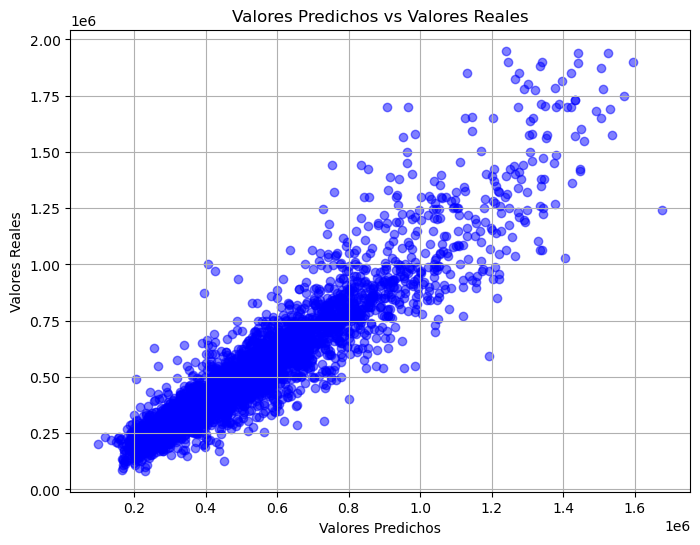

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter( predicciones,y_test, color='blue', alpha=0.5)
plt.title('Valores Predichos vs Valores Reales')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.grid(True)
plt.show()

In [50]:
# Calcular el Error Porcentual Absoluto (APE) para cada observación
APE = np.abs((np.array(y_test) - np.array(predicciones)) / np.array(y_test)) * 100

# Calcular el MAPE
MAPE = np.mean(APE)

print(f'MAPE: {MAPE:.2f}%')

MAPE: 13.29%


In [51]:
# Importancia de los predictores basada en permutación
# ==============================================================================
importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train_prep,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train_prep.columns
df_importancia.sort_values('importances_mean', ascending=False)

importances_mean  importances_std          feature
46         153162.50           586.73              lat
40         102773.89           579.85      sqft_living
47          58716.85           586.27             long
48          53821.06           331.20    sqft_living15
44          45222.13           510.24       sqft_above
50          31807.38           461.97        AñosConst
39          21028.26            99.02        bathrooms
11          19853.55           367.83          grade_7
43          19268.71           206.12             view
51          18527.33           379.87        AñosRenov
49          18037.25           115.26       sqft_lot15
41          16717.62            89.55         sqft_lot
13          16351.25           272.93          grade_9
14          14501.83           188.87         grade_10
12          13306.22           237.72          grade_8
45          11405.57            81.60    sqft_basement
38           5833.65            48.12         bedrooms
15           5615.35            57.13         grade_11
42           5084.16            95.57           floors
3            4930.07           142.79      condition_3
0            4667.29            43.27     waterfront_1
37           4544.16            73.77   zipcode_2_Otro
10           3109.88           100.29          grade_6
16           2148.16            27.93         grade_12
4            2018.78            37.96      condition_4
5            1664.10            20.40      condition_5
20            821.64            14.36  zipcode_2_98033
30            517.17            28.38  zipcode_2_98103
17            492.29            11.01  zipcode_2_98006
31            481.45            19.33  zipcode_2_98115
33            317.08            10.15  zipcode_2_98118
18            282.76            28.80  zipcode_2_98023
29            273.23            12.43  zipcode_2_98074
21            261.62            14.06  zipcode_2_98034
19            261.14             7.80  zipcode_2_98027
36            247.91            10.90  zipcode_2_98155
2             235.81             3.58      condition_2
35            208.49             9.57  zipcode_2_98133
32            190.33            11.32  zipcode_2_98117
24            188.40             5.50  zipcode_2_98052
28            182.80             6.34  zipcode_2_98059
23            148.75             2.80  zipcode_2_98042
25            143.74             2.67  zipcode_2_98053
34            126.64            10.95  zipcode_2_98125
9             125.87             2.29          grade_5
26            117.14             2.45  zipcode_2_98056
22            114.54             7.60  zipcode_2_98038
27             81.00             2.63  zipcode_2_98058
1              67.78             0.31      condition_1
8              12.92             0.16          grade_4
7               1.41             0.00          grade_3
6               0.62             0.00          grade_1

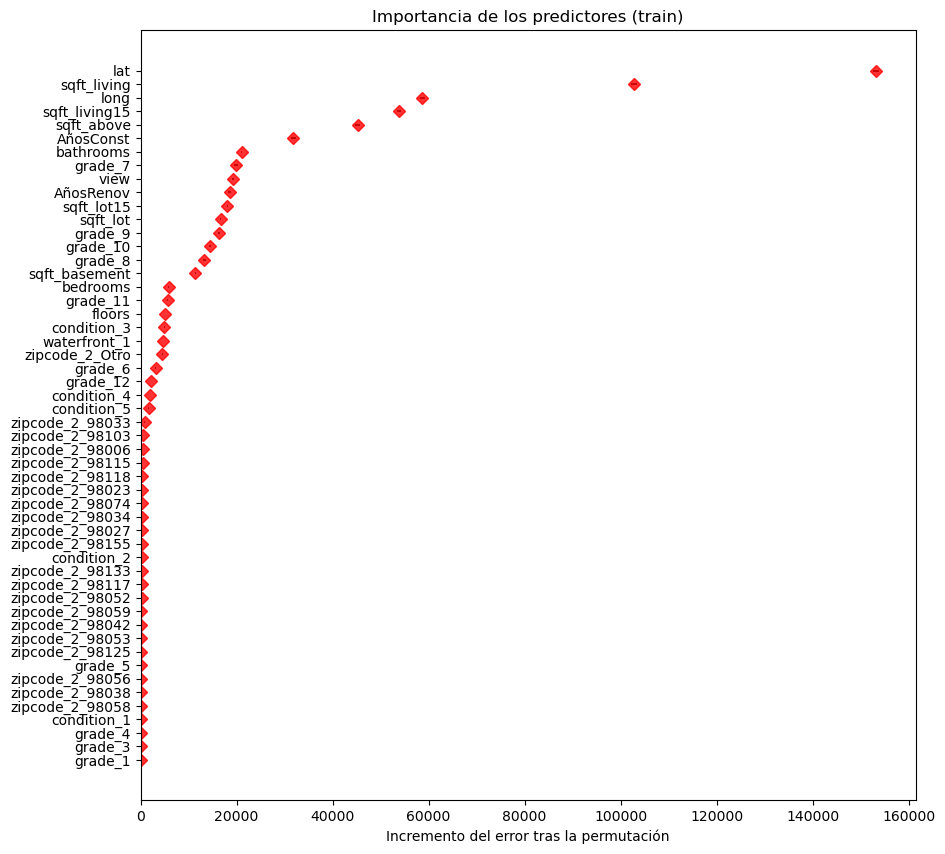

In [53]:
# Gráfico de la importancia de cada predictor
# ==============================================================================
fig, ax = plt.subplots(figsize=(10, 10))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

In [56]:
from xgboost import XGBRegressor
from scipy.stats import randint, uniform
import multiprocessing

In [58]:
# Define un espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators':  [150],
    'learning_rate': [0.02, 0.05, 0.1],
    'subsample':     [0.6, 0.7, 0.8],
    'max_depth':     [5, 6, 7, 8],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [2, 3, 4],
    'gamma': [0.1,0.2, 0.3, 0.4]
}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
            estimator  = XGBRegressor(objective='reg:squarederror',random_state=123),
            param_grid = param_grid,
            scoring    = 'neg_root_mean_squared_error',
            n_jobs     = multiprocessing.cpu_count() - 1,
            cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
            refit      = True,
            verbose    = 0,
            return_train_score = True
       )

grid.fit(X = X_train_prep, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

param_colsample_bytree param_gamma param_learning_rate param_max_depth  \
94                    0.80        0.10                0.10               7   
202                   0.80        0.20                0.10               7   
418                   0.80        0.40                0.10               7   
310                   0.80        0.30                0.10               7   

    param_min_child_weight param_n_estimators param_subsample  \
94                       3                150            0.70   
202                      3                150            0.70   
418                      3                150            0.70   
310                      3                150            0.70   

     mean_test_score  std_test_score  mean_train_score  std_train_score  
94         -94021.70         2001.03         -54705.57           497.89  
202        -94021.70         2001.03         -54705.57           497.89  
418        -94021.70         2001.03         -54705.57           497.89  
310        -94021.70         2001.03         -54705.57           497.89

In [59]:
# Mejores hiperparámetros encontrados mediante validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 150, 'subsample': 0.7} : -94021.69555122597 neg_root_mean_squared_error


In [60]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X=X_test_prep)
rmse = root_mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 91918.72863501325


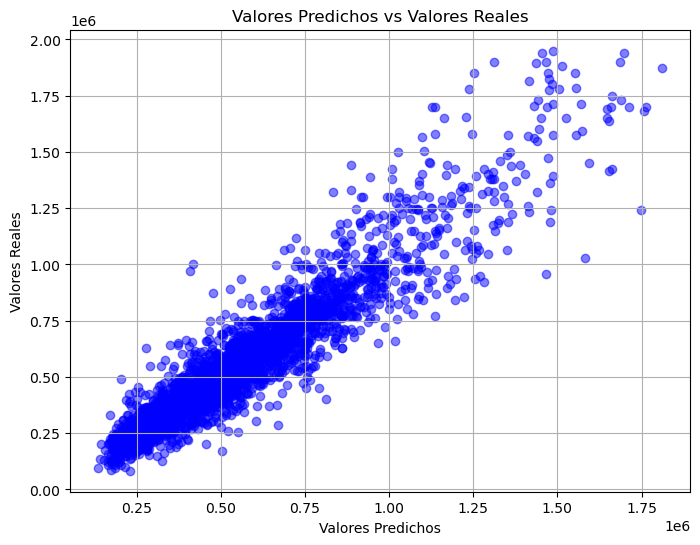

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter( predicciones,y_test, color='blue', alpha=0.5)
plt.title('Valores Predichos vs Valores Reales')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.grid(True)
plt.show()

In [62]:
# Calcular el Error Porcentual Absoluto (APE) para cada observación
APE = np.abs((np.array(y_test) - np.array(predicciones)) / np.array(y_test)) * 100

# Calcular el MAPE
MAPE = np.mean(APE)

print(f'MAPE: {MAPE:.2f}%')

MAPE: 12.12%
